In [81]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import numpy as np

C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\HP\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


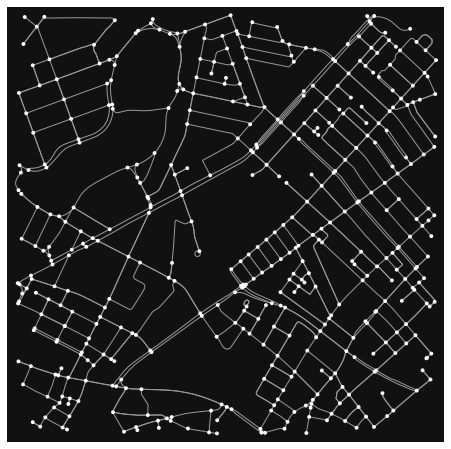

In [211]:
#creating graph networkx
G=ox.graph_from_point((42.33833375,-71.08794164),dist=1000,network_type='drive')
fig, ax = ox.plot_graph(G)

In [83]:
G

In [168]:
G.nodes

NodeView((61342121, 61342122, 61342156, 61342179, 61342215, 61342494, 61342498, 61342511, 61342512, 61342520, 61342537, 61342539, 61342575, 61342579, 61342618, 61342624, 61342626, 61342641, 61342645, 61342673, 61342773, 61342790, 61342793, 61342797, 61342799, 61342812, 61342819, 61342821, 61342823, 61342883, 61342925, 61342927, 61342935, 61342937, 61342938, 61342947, 61342961, 61342986, 61342992, 61343261, 61343284, 61343288, 61343292, 61343296, 61343303, 61343337, 61343338, 61343390, 61343394, 61343449, 61343459, 61343517, 61343519, 61343528, 61343533, 61343541, 61343546, 61344019, 61344054, 61344058, 61344066, 61344073, 61344084, 61344131, 61344146, 61344220, 61344272, 61344295, 61344297, 61344299, 61344302, 61344388, 61344392, 61344397, 61344407, 61344581, 61344604, 61344632, 61344639, 61344698, 61344706, 61344708, 61344716, 61344717, 61344723, 61344725, 61344759, 61344760, 61344772, 61344775, 61344902, 61344926, 61344930, 61344932, 61344936, 61344974, 61344978, 61344980, 61344982, 

In [124]:
G[61343394]

AdjacencyView({61355924: {0: {'osmid': 435323882, 'lanes': '2', 'name': 'Gainsborough Street', 'highway': 'unclassified', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 81.201, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A160B8C70>, 'weight': 81.201}}, 61343390: {0: {'osmid': 435323882, 'lanes': '2', 'name': 'Gainsborough Street', 'highway': 'unclassified', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 88.37899999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A160B8B50>, 'weight': 88.37899999999999}}, 61351176: {0: {'osmid': 861235907, 'lanes': '2', 'name': 'Saint Botolph Street', 'highway': 'unclassified', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 194.82500000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A160B84C0>, 'weight': 194.82500000000002}}, 61485036: {0: {'osmid': 861235907, 'lanes': '2', 'name': 'Saint Botolph Street', 'high

In [125]:
G[61343394][61355924]

AtlasView({0: {'osmid': 435323882, 'lanes': '2', 'name': 'Gainsborough Street', 'highway': 'unclassified', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 81.201, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A160B8C70>, 'weight': 81.201}})

In [112]:
G.nodes[3344720623]

{'y': 42.3460362, 'x': -71.0956592, 'street_count': 3}

In [130]:
G.nodes[61343394]

{'y': 42.3408979, 'x': -71.085662, 'highway': 'stop', 'street_count': 4}

In [143]:
G[61343303]

AdjacencyView({61503160: {0: {'osmid': 8639418, 'lanes': '2', 'name': 'Kilmarnock Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 98.397, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A16EDD6A0>, 'weight': 98.397}}, 61353625: {0: {'osmid': 591284900, 'lanes': '2', 'name': 'Kilmarnock Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '15.2', 'oneway': False, 'length': 161.27, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A16EDD640>, 'weight': 161.27}}, 61343261: {0: {'osmid': 591284902, 'oneway': True, 'lanes': '1', 'name': 'Queensberry Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '18.3', 'length': 191.844, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A16EDD6D0>, 'weight': 191.844}}})

In [ ]:
##adding edge attribute to the nodes >>>> length as weight

for (u,v,k) in G.edges:
    k=G[u][v][0]['length']
    G[u][v][0]['weight']=k
    #nx.set_edge_attributes(G,k,'weight')

#G[61342793][3344720623][0]['length']

In [114]:
#important to find nearest node

start = ox.get_nearest_node(G, (42.3460362,-71.0956592), method='euclidean')
end = ox.get_nearest_node(G, ( 42.340615, -71.085362), method='euclidean')

In [126]:
start

3344720623

In [127]:
end

61343394

In [146]:
G.nodes[3344720623]

In [134]:
#testing using inbuilt shortest path finder

route = nx.shortest_path(G, 3344720623, 61343394, weight='length')
route

[3344720623,
 61342520,
 61383336,
 61342511,
 1019271507,
 1627853204,
 2488866023,
 61342961,
 1016874899,
 61357862,
 61425381,
 61422907,
 61344073,
 61344058,
 61344054,
 61423858,
 61342673,
 61343390,
 61343394]

In [163]:
##THERE ARE TWO DIFFERENT CODE IMPLEMENTATION OF DJIKSTRA'S , BOTH REQUIRE CHANGES TO WORK


#the code for Dijkstra's Algorithm --- "1st code!!!!!!!!!!!!!!!!

from queue import PriorityQueue
from math import inf
# graph dependency  
import networkx as nx


"""Dijkstra's shortest path algorithm"""
def dijkstra(graph: 'networkx.classes.graph.Graph', start: str, end: str) -> 'List':
    """Get the shortest path of nodes by going backwards through prev list
    credits: https://github.com/blkrt/dijkstra-python/blob/3dfeaa789e013567cd1d55c9a4db659309dea7a5/dijkstra.py#L5-L10"""
    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
        
    """get the cost of edges from node -> node
    cost(u,v) = edge_weight(u,v)"""
    def cost(u, v):
        return graph.get_edge_data(u,v)[0].get('weight')
        
    """main algorithm"""
    # predecessor of current node on shortest path 
    prev = {} 
    # initialize distances from start -> given node i.e. dist[node] = dist(start, node)
    dist = {v: inf for v in list(nx.nodes(graph))} 
    # nodes we've visited
    visited = set() 
    # prioritize nodes from start -> node with the shortest distance!
    ## elements stored as tuples (distance, node) 
    pq = PriorityQueue()  
    
    dist[start] = 0  # dist from start -> start is zero
    pq.put((dist[start], start))
    
    while 0 != pq.qsize():
        curr_cost, curr = pq.get()
        visited.add(curr)
        print(f'visiting {curr}')
        # look at curr's adjacent nodes
        for neighbor in dict(graph.adjacency()).get(curr):
            # if we found a shorter path 
            path = dist[curr] + cost(curr, neighbor)
            if path < dist[neighbor]:
                # update the distance, we found a shorter one!
                dist[neighbor] = path
                # update the previous node to be prev on new shortest path
                prev[neighbor] = curr
                # if we haven't visited the neighbor
                if neighbor not in visited:
                    # insert into priority queue and mark as visited
                    visited.add(neighbor)
                    pq.put((dist[neighbor],neighbor))
                # otherwise update the entry in the priority queue
                else:
                    # remove old
                    _ = pq.get((dist[neighbor],neighbor))
                    # insert new
                    pq.put((dist[neighbor],neighbor))
    print("=== Dijkstra's Algo Output ===")
    print("Distances")
    print(dist)
    print("Visited")
    print(visited)
    print("Previous")
    print(prev)
    # we are done after every possible path has been checked 
    return backtrace(prev, start, end), dist[end]

In [164]:
#throwing error

dijkstra(G,3344720623,61343390)

visiting 3344720623
visiting 61342520
visiting 61383336
visiting 61342121
visiting 61342511
visiting 61342494
visiting 61342793
visiting 61342498
visiting 61380142
visiting 5456460675
visiting 61342512
visiting 61352175
visiting 61342790
visiting 5456460674
visiting 5456460674
visiting 61395527
visiting 61351830
visiting 7604008467
visiting 61342819
visiting 61480626
visiting 61395527
visiting 61343261
visiting 61353600
visiting 61349147
visiting 61353600
visiting 61353625
visiting 61349165
visiting 61349161
visiting 9627805714
visiting 61343303
=== Dijkstra's Algo Output ===
Distances
{61342121: 153.26700000000002, 61342122: inf, 61342156: inf, 61342179: inf, 61342215: inf, 61342494: 186.73399999999998, 61342498: 261.14599999999996, 61342511: 185.54899999999998, 61342512: 312.75800000000004, 61342520: 95.67099999999999, 61342537: inf, 61342539: inf, 61342575: inf, 61342579: inf, 61342618: inf, 61342624: inf, 61342626: inf, 61342641: inf, 61342645: inf, 61342673: inf, 61342773: inf, 61

KeyError: 61343390

In [101]:
#G[61347503]

In [108]:
#G.edges(data=True)

In [103]:
#ox.extended_stats(G,bc=True)
#nx.betweenness_centrality(G, weight=None)
#nx.betweenness_centrality(G, weight='length')

In [212]:
#G.edges(61342793, 3344720623)

In [104]:
#G.edges

In [105]:
#weight=l

In [67]:
#nx.set_edge_attributes(G,weight,'weight')

In [87]:
#G.add_edge(61342793,3344720623,weight=224.15900000000002)

In [106]:
#G[61342793][3344720623]

In [93]:
G.get_edge_data(61342793,3344720623)[0].get('weight')

224.15900000000002

In [160]:
for neighbor in dict(G.adjacency()).get(61343390):
    print(neighbor)

61342673
61371056
61343394


In [158]:
t

{61342673: {0: {'osmid': 435323882,
   'lanes': '2',
   'name': 'Gainsborough Street',
   'highway': 'unclassified',
   'maxspeed': '25 mph',
   'width': '15.2',
   'oneway': False,
   'length': 13.116,
   'weight': 13.116}},
 61371056: {0: {'osmid': 8649129,
   'oneway': True,
   'lanes': '2',
   'ref': 'MA 9',
   'name': 'Huntington Avenue',
   'highway': 'primary',
   'maxspeed': '25 mph',
   'width': '30.2',
   'length': 29.825000000000003,
   'geometry': <shapely.geometry.linestring.LineString at 0x12a160b8040>,
   'weight': 29.825000000000003}},
 61343394: {0: {'osmid': 435323882,
   'lanes': '2',
   'name': 'Gainsborough Street',
   'highway': 'unclassified',
   'maxspeed': '25 mph',
   'width': '15.2',
   'oneway': False,
   'length': 88.37899999999999,
   'geometry': <shapely.geometry.linestring.LineString at 0x12a160b89a0>,
   'weight': 88.37899999999999}}}

In [208]:
#the code for Dijkstra's Algorithm --- "2nd code!!!!!!!!!!!!!!!!

def dijkstra(G, u, v, return_path_directions=True):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Returns path, distance
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}
    shortest_paths = {u:[u]}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    #weight = 1 # Set default weight for non-weighted graphs
    
    """
    get the cost of edges from node -> node
    cost(u,v) = edge_weight(u,v)
    """
    
    def cost(u, v):
        return G.get_edge_data(u,v)[0].get('weight')
    
    
    while len(unvisited) > 0: 
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update: Add weight update for weighted graphs
            # Set either the distance through the current node or a previous shorter path
            #print(node,"node")
           # print(distances[node],"distances[node]")
            if distances[cur_node] + cost(cur_node, node) < distances[node]:
                distances[node] = distances[cur_node] + cost(cur_node, node)
                shortest_paths[node] = shortest_paths[cur_node] + [node]
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        #print(cur_node,"1")
        if cur_node == v:
            break
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
        #print(cur_node,"2")
    
    if min([distances[node] for node in visited]) == np.inf:
            print('There is no path between u and v.')
            return np.nan
    
    if return_path_directions:
        #print("shortest_paths")
        #print(shortest_paths)
        #print("distances")
        #print(distances)
        return shortest_paths[v], distances[v]
    else:
        return distances[v]

In [209]:
dijkstra(G,61372773,61349165)

KeyError: 61349165

In [174]:
unvisited = set(G.nodes)

In [176]:
distances = {61372773:0}

In [178]:
for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf

In [180]:
distances

{61372773: inf,
 61562881: inf,
 61423618: inf,
 61562897: inf,
 9627805714: inf,
 1188505620: inf,
 61405209: inf,
 61345827: inf,
 6521036846: inf,
 61483055: inf,
 6521036847: inf,
 61493303: inf,
 61589559: inf,
 61358139: inf,
 61517900: inf,
 4257783926: inf,
 3059984504: inf,
 61358207: inf,
 61483143: inf,
 61509768: inf,
 61366425: inf,
 61370525: inf,
 4261060789: inf,
 4261060797: inf,
 61350081: inf,
 61423819: inf,
 3042027727: inf,
 61348055: inf,
 61495514: inf,
 61483234: inf,
 61352171: inf,
 61352173: inf,
 61446381: inf,
 61352175: inf,
 61423858: inf,
 61475058: inf,
 61479161: inf,
 61475070: inf,
 61423879: inf,
 7795050766: inf,
 61344019: inf,
 61589781: inf,
 4867561757: inf,
 61473055: inf,
 61423920: inf,
 61497649: inf,
 61344054: inf,
 61344058: inf,
 61344066: inf,
 1173895492: inf,
 61344073: inf,
 61362515: inf,
 61344084: inf,
 61364564: inf,
 1019271507: inf,
 61362520: inf,
 1618241880: inf,
 61364581: inf,
 61364589: inf,
 61344131: inf,
 61518222: i

In [175]:
u=[distances[node] for node in unvisited]

NameError: name 'distances' is not defined

In [188]:
shortest_paths = {61372773:[61372773]}

In [197]:
G[61349161]

AdjacencyView({9627805714: {0: {'osmid': 923642505, 'oneway': True, 'lanes': '2', 'name': 'Park Drive', 'highway': 'primary', 'maxspeed': '30 mph', 'width': '30.2', 'length': 48.025000000000006, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000012A17D51C70>, 'weight': 48.025000000000006}}})

In [203]:
n=G[61349147]

In [204]:
for i in n:
    print(i)

61353600
61349165
